# Estructurando un Proyecto de DS (Parte I)

## Abstract

El conjunto de datos que se analiza en este estudio se centra en la reserva de hoteles y la probabilidad de que estas reservas sean canceladas. El dataset contiene información detallada sobre las reservas realizadas en distintos hoteles, incluyendo información sobre el tipo de habitación reservada, la duración de la estancia, la anticipación de la reserva, la fecha de llegada, la cantidad de personas y dias que reservan, entre otros datos.

El objetivo principal de este estudio es analizar la probabilidad de que las reservas de hotel sean canceladas y determinar qué factores pueden influir en esta decisión. Para lograr este objetivo, se llevaran a cabo varios análisis estadísticos y van a utilizarse diferentes técnicas de modelado predictivo.



- ¿Afecta el tipo de mercado el estado final de la reserva?

- ¿Existe relación entre el estado de la reserva y el tiempo de llegada al hotel?

- ¿Hay alguna época en particular en la que se realizan mayor cantidad de cancelaciones?

### Importación de Librerias

In [2]:
# Pandas
import pandas as pd
# Matplotlib
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

### Importación de Dataset

In [21]:
hotel = pd.read_csv('./ReservaHotel.csv')

In [22]:
hotel.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
hotel.shape

(36275, 19)

In [27]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   type_of_meal_plan           36275 non-null  object        
 1   required_car_parking_space  36275 non-null  int64         
 2   room_type_reserved          36275 non-null  object        
 3   lead_time                   36275 non-null  int64         
 4   market_segment_type         36275 non-null  object        
 5   repeated_guest              36275 non-null  int64         
 6   avg_price_per_room          36275 non-null  float64       
 7   no_of_special_requests      36275 non-null  int64         
 8   booking_status              36275 non-null  object        
 9   arrival                     36275 non-null  datetime64[ns]
 10  total_people                36275 non-null  int64         
 11  total_nights                36275 non-null  int64     

Las variables del dataset son:
- Booking_ID: ID de reserva.
- no_of_adults: número de adultos.
- no_of_children: número de niños.
- no_of_weekend_nights: número de noches de fin de semana reservado.
- no_of_week_nights: número de noches de dias de semana reservado.
- type_of_meal_plan: plan de alimentación elegido.
- required_car_parking_space: si requiere estacionamiento o no.
- room_type_reserved: tipo de habitación reservada.
- lead_time: cantidad de dias en que hace la reservación.
- arrival_year: año de llegada al hotel.
- arrival_month: mes de llegada al hotel.
- arrival_date: dia de llegada al hotel.
- market_segment_type: lugar desde el que se realizo la reserva.
- repeated_guest: si la persona que reserva ya habia reservado con anterioridad.
- no_of_previous_cancellations: cantidad de cancelaciones previas.
- no_of_previous_bookings_not_canceled: cantidad de reservas previas no canceladas.
- avg_price_per_room: precio promedio por habitación.
- no_of_special_requests: cantidad de pedidos especiales.
- booking_status: estado final de la reserva.

In [23]:
# unifico las variables arrival para crear una unica variable con la fecha

from datetime import datetime

hotel['arrival'] = hotel['arrival_year'].astype(str) + '-' + hotel['arrival_month'].astype(str) + '-' + hotel['arrival_date'].astype(str)
hotel['arrival'] = pd.to_datetime(hotel['arrival'], format='%Y-%m-%d')

In [24]:
# unifico las variables de adults y children para ver el total de personas.
hotel['total_people'] = hotel['no_of_adults'] + hotel['no_of_children']

# unifico el numero de nights para ver su total
hotel['total_nights'] = hotel['no_of_weekend_nights'] + hotel['no_of_week_nights']

# unifico el numero de reservas anteriores
hotel['previous_booking'] = hotel['no_of_previous_bookings_not_canceled'] + hotel['no_of_previous_cancellations']

In [25]:
# elimino las columnas unificadas
hotel = hotel.drop(columns=['Booking_ID','no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','arrival_year','arrival_month','arrival_date','no_of_previous_cancellations','no_of_previous_bookings_not_canceled'], axis=1)

In [26]:
hotel.head()

,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status,arrival,total_people,total_nights,previous_booking
0,Meal Plan 1,0,Room_Type 1,224,Offline,0,65.00,0,Not_Canceled,2017-10-02,2,3,0
1,Not Selected,0,Room_Type 1,5,Online,0,106.68,1,Not_Canceled,2018-11-06,2,5,0
2,Meal Plan 1,0,Room_Type 1,1,Online,0,60.00,0,Canceled,2018-02-28,1,3,0
3,Meal Plan 1,0,Room_Type 1,211,Online,0,100.00,0,Canceled,2018-05-20,2,2,0
4,Not Selected,0,Room_Type 1,48,Online,0,94.50,0,Canceled,2018-04-11,2,2,0


In [12]:
hotel.shape

(36275, 14)

### Gráficos descriptivos

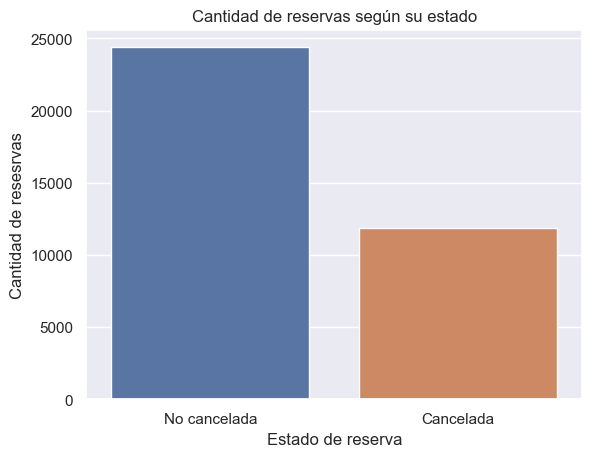

In [38]:
hs = sns.countplot(data=hotel, x= "booking_status", palette='deep')
hs.set_title('Cantidad de reservas según su estado')
labels = ('No cancelada', 'Cancelada')
hs.set_ylabel('Cantidad de resesrvas')
hs.set_xlabel('Estado de reserva')
hs.set_xticklabels(labels)
plt.show()

In [41]:
hotel['booking_status'].value_counts().mul(100)/len(hotel)

Not_Canceled    67.236389
Canceled        32.763611
Name: booking_status, dtype: float64

*De acuerdo a lo observado, las reservas NO CANCELADAS alcanzan un total aproximado de 67%, mientras que las reservas CANCELADAS son de alrededor del 33%.*

Text(0.5, 1.0, 'Lead Time vs. Status')

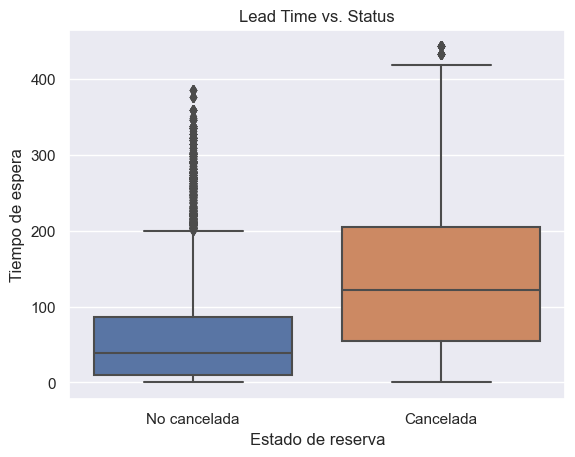

In [44]:
hl = sns.boxplot(x='booking_status', y='lead_time', data = hotel)
sns.set(font_scale=1)
hl.set_ylabel('Tiempo de espera')
hl.set_xlabel('Estado de reserva')
hl.set_xticklabels(labels)
plt.title("Lead Time vs. Status")

In [45]:
hotel['lead_time'].describe()

count    36275.000000
mean        85.232557
std         85.930817
min          0.000000
25%         17.000000
50%         57.000000
75%        126.000000
max        443.000000
Name: lead_time, dtype: float64

*En función de lo que visualizamos, podemos determinar que a mayor cantidad de dias de espera para el arribo al hotel, mayor es la tasa de cancelaciones, llegando incluso a visualizar "outliers" con valores mayores a 400 dias. Sin embargo, hay reservas con tiempos de espera menores a esa cantidad que no fueron canceladas*

In [52]:
hotel_pivot = pd.pivot_table(hotel.reset_index(),columns=['market_segment_type','type_of_meal_plan'],
                             index=['booking_status'],
                             values='index',
                             fill_value=0,
                             aggfunc=len)
hotel_pivot

market_segment_type    Aviation Complementary                          \
type_of_meal_plan   Meal Plan 1   Meal Plan 1 Meal Plan 2 Meal Plan 3   
booking_status                                                          
Canceled                     37             0           0           0   
Not_Canceled                 88           370          11           4   

market_segment_type                Corporate                           \
type_of_meal_plan   Not Selected Meal Plan 1 Meal Plan 2 Not Selected   
booking_status                                                          
Canceled                       0         213           0            7   
Not_Canceled                   6        1783           6            8   

market_segment_type     Offline                                       \
type_of_meal_plan   Meal Plan 1 Meal Plan 2 Meal Plan 3 Not Selected   
booking_status                                                         
Canceled                   2176         961           1           15   
Not_Canceled               5812        1404           0          159   

market_segment_type      Online                           
type_of_meal_plan   Meal Plan 1 Meal Plan 2 Not Selected  
booking_status                                            
Canceled                   6253         545         1677  
Not_Canceled              11103         378         3258

In [53]:
hotel_pivot_def = hotel_pivot/len(hotel)*100
hotel_pivot_def

market_segment_type    Aviation Complementary                          \
type_of_meal_plan   Meal Plan 1   Meal Plan 1 Meal Plan 2 Meal Plan 3   
booking_status                                                          
Canceled               0.101999      0.000000    0.000000    0.000000   
Not_Canceled           0.242591      1.019986    0.030324    0.011027   

market_segment_type                Corporate                           \
type_of_meal_plan   Not Selected Meal Plan 1 Meal Plan 2 Not Selected   
booking_status                                                          
Canceled                 0.00000    0.587181     0.00000     0.019297   
Not_Canceled             0.01654    4.915231     0.01654     0.022054   

market_segment_type     Offline                                       \
type_of_meal_plan   Meal Plan 1 Meal Plan 2 Meal Plan 3 Not Selected   
booking_status                                                         
Canceled               5.998622    2.649207    0.002757     0.041351   
Not_Canceled          16.022054    3.870434    0.000000     0.438318   

market_segment_type      Online                           
type_of_meal_plan   Meal Plan 1 Meal Plan 2 Not Selected  
booking_status                                            
Canceled              17.237767    1.502412     4.623019  
Not_Canceled          30.607857    1.042040     8.981392

*Analizando las variables de segmento de mercado de acuerdo al plan de comidas y al estado de las reservas, se puede determinar que en el segmento "Complementary", para todos sus planes de comida, no se realizan cancelaciones; si podemos observar que las mayores cancelaciones se producen para las reservas "Online" y el plan de comidas "Meal Plan 1".*

*Tambien se visualiza claramente que, para aquellas reservas que no son canceladas, el plan de comidas "Meal Plan 1" tiene una alta incidencia en dicha decisión( al igual que con las canceladas), por lo que la variable termina teniendo relevancia en nuestro análisis.*